# Get mean frequency (in kHz)

### Idea
1. Get wav voice data -> Visualize voice
2. Cut out the parts without voice -> visualize voice after cut
3. Show in spectrogram

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import glob
import IPython.display as ipd

In [2]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
FEMALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\females"

In [30]:
FIGSIZE=(12, 4)

In [5]:
male_list = glob.glob(MALE_DATA + "\\*.wav")
female_list = glob.glob(FEMALE_DATA + "\\*.wav")

In [6]:
gender_list = []
for item in male_list:
    gender_list.append("male")
for item in female_list:
    gender_list.append("female")

In [7]:
labels = pd.DataFrame(gender_list)

In [23]:
# play the audio file
ipd.Audio(male_list[0])

In [ ]:
y_male_test, sr_male_test = librosa.load(male_list[0], res_type='kaiser_fast', duration=3)
# y_male_test, sr_male_test = librosa.load(male_list[0], res_type='kaiser_fast')

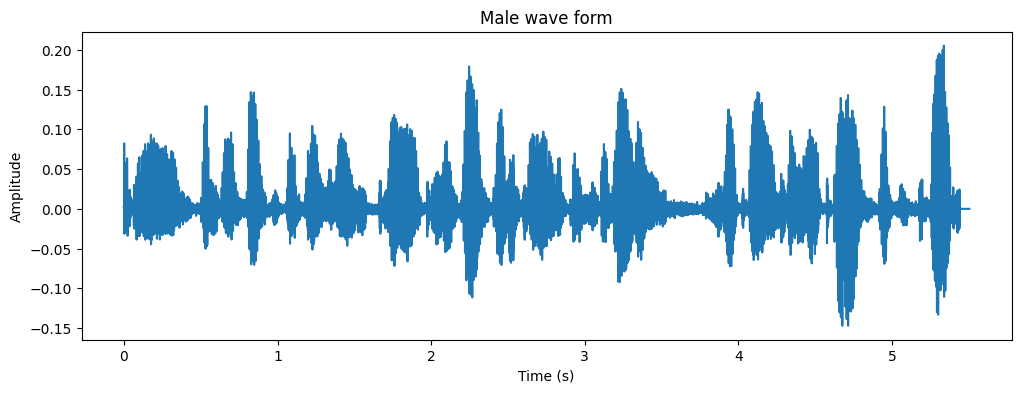

In [ ]:
# Visualize male voice
plt.figure(figsize=FIGSIZE)
time = librosa.samples_to_time(np.arange(len(y_male_test)), sr=sr_male_test)
plt.plot(time, y_male_test)
plt.title('Male wave form')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### If use top_db=10, can see spectrogram to get meanfreq else
### can use top_db=60, then use clustering to get class have voice, use this to get meanfreq

In [ ]:
intervals = librosa.effects.split(y_male_test, top_db=60)
intervals

array([[     0, 121344]])

In [ ]:
y_male_test[intervals[0][0]:intervals[0][1]]

array([0.00200475, 0.00230182, 0.001593  , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
len(intervals)
temp = y_male_test[intervals[0][0]:intervals[0][1]]
for i in range(1,len(intervals)):
    temp = np.concatenate((temp, y_male_test[intervals[i][0]:intervals[i][1]]), axis=0)

In [ ]:
len(y_male_test)

121364

In [ ]:
len(temp)

121344

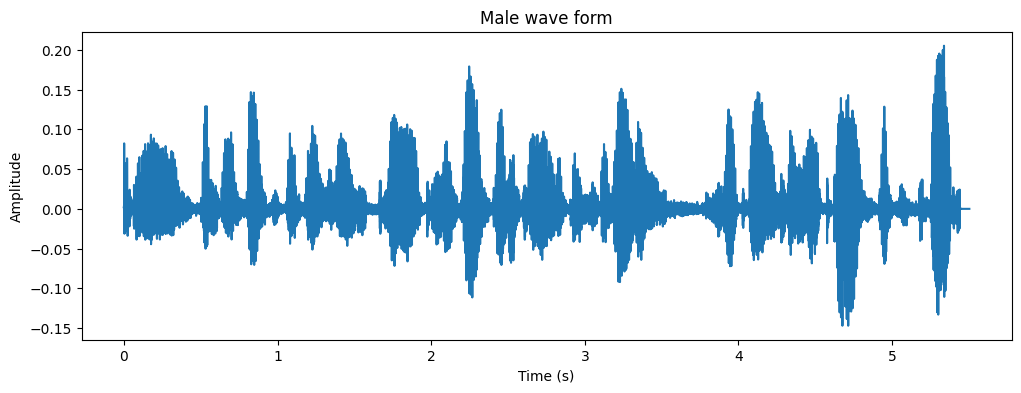

In [ ]:
# Visualize male voice after cut
plt.figure(figsize=FIGSIZE)
time = librosa.samples_to_time(np.arange(len(temp)), sr=sr_male_test)
plt.plot(time, temp)
plt.title('Male wave form')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

2048
4.5351473922902495e-05


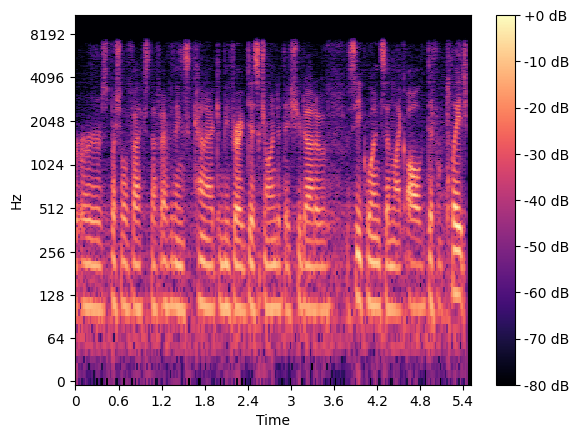

In [ ]:
# Visualize spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(temp)), ref=np.max)
# D = librosa.amplitude_to_db(np.abs(librosa.stft(temp)),ref=1.0, amin=1e-05, top_db=80.0)
librosa.display.specshow(D, y_axis='log', sr=sr_male_test,
                         x_axis='time')
# add color
plt.colorbar(format='%+2.0f dB')

In [ ]:
D[10]

array([-21.680859 , -21.307878 , -27.902353 , -54.986214 , -20.83281  ,
       -14.124908 , -11.841473 , -11.419489 , -11.588421 , -11.574724 ,
       -12.372206 , -13.395721 , -13.341074 , -13.892391 , -14.253014 ,
       -14.6360035, -18.076042 , -20.802845 , -29.783424 , -39.695053 ,
       -37.81621  , -35.6181   , -20.83565  , -13.021168 , -12.390118 ,
       -18.586521 , -29.921764 , -29.054407 , -17.295607 , -13.240881 ,
       -12.250555 , -13.850292 , -15.997509 , -19.783123 , -34.69812  ,
       -16.527363 , -13.396254 , -12.243965 , -11.965363 , -13.559801 ,
       -19.249584 , -34.90683  , -38.369404 , -34.616848 , -41.543858 ,
       -33.535618 , -17.937447 , -12.631414 , -13.7474   , -17.888084 ,
       -25.867058 , -27.223824 , -19.376839 , -15.348421 , -11.600784 ,
       -11.085991 , -12.849474 , -12.863939 , -12.380421 , -12.529768 ,
       -12.098427 , -11.044945 , -10.978077 , -12.200163 , -13.060316 ,
       -15.964422 , -20.004812 , -26.611681 , -32.241104 , -32.3

In [ ]:
ls = []
for i in range (len(D)):
    ls.append(sum(D[i]))
ls

10

In [ ]:
D.shape

(1025, 238)

In [ ]:
# Get meanfreq
meanfreq = librosa.feature.spectral_centroid(y=temp)

2048
4.5351473922902495e-05


In [ ]:
print(len(D[0]))
sum(D[120])

238


-11608.296709060669

In [ ]:
ls = []
for i in range(97):
    ls.append(0)

for i in range(len(D)):


SyntaxError: incomplete input (2639018003.py, line 5)